In [1]:
!pip install opencv-python

In [2]:
!pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator    # one by one will give it to the the ram.. load will be less on ram
from keras.preprocessing import image
import os


c:\Users\INDUS\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\INDUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\INDUS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [1]:
image_sample=image.load_img("F:/cat dog/test_set/test_set/cats/cat.4761.jpg")

NameError: name 'image' is not defined

In [5]:
image_sample2=image.load_img("F:/cat dog/test_set/test_set/cats/cat.4959.jpg")

AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'

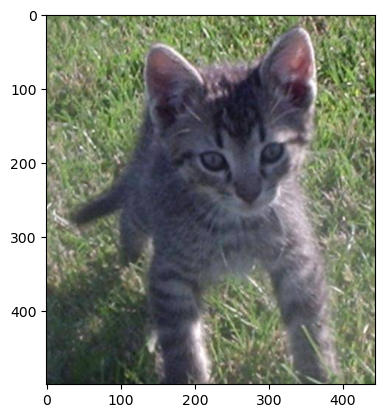

In [35]:
plt.imshow(image_sample2)

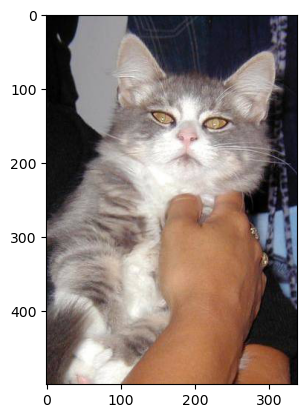

In [18]:
plt.imshow(image_sample)

In [32]:
cv2.imread("F:/cat dog/test_set/test_set/cats/cat.4761.jpg").shape

(499, 339, 3)

THE PICTURE IS IN RGB

In [37]:
cv2.imread("F:/cat dog/test_set/test_set/cats/cat.4959.jpg").shape

(499, 444, 3)

CHECKING IMAGE SHAPE FOR DOG

In [43]:
cv2.imread("F:/cat dog/training_set/training_set/dogs/dog.1.jpg").shape

(499, 327, 3)

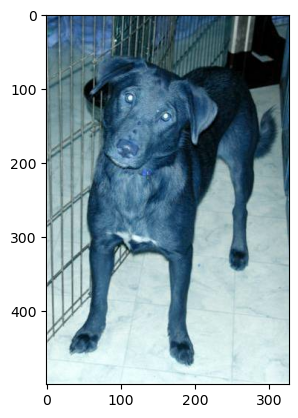

In [41]:
plt.imshow(image_sampledog)

for making sure that every image is in same shape we scale down it

In [44]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)   
test=ImageDataGenerator(rescale=1/255)

In [64]:
train_dataset = train.flow_from_directory(
    "F:/cat dog/training_set/training_set",
    target_size=(200, 200),
    batch_size=5,
    class_mode="binary"
)

Found 8005 images belonging to 2 classes.


In [69]:
test_dataset = test.flow_from_directory(
    "F:/cat dog/test_set/test_set",
    target_size=(200, 200),
    batch_size=5,
    class_mode="binary")



Found 2023 images belonging to 2 classes.


In [71]:
validation_dataset = validation.flow_from_directory(
    "F:/cat dog/validation_data",
    target_size=(200, 200),
    batch_size=5,
    class_mode="binary")



Found 1000 images belonging to 2 classes.


In [72]:
train_dataset.class_indices

{'cats': 0, 'dogs': 1}

In [73]:
validation_dataset.class_indices

{'cats': 0, 'dogs': 1}

In [80]:
test_dataset.class_indices

{'cats': 0, 'dogs': 1}

In [85]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [86]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


In [89]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [88]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

c:\Users\INDUS\anaconda3\lib\site-packages\keras\optimizers\legacy\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [91]:
model.fit(train_dataset, validation_data=validation_dataset, epochs=15,batch_size=5,shuffle=False)

Epoch 1/15
1601/1601 [==============================] - 1093s 681ms/step - loss: 0.6822 - acc: 0.5610 - val_loss: 0.6596 - val_acc: 0.6310
Epoch 2/15
1601/1601 [==============================] - 926s 579ms/step - loss: 0.6332 - acc: 0.6725 - val_loss: 0.6441 - val_acc: 0.6570
Epoch 3/15
1601/1601 [==============================] - 1067s 666ms/step - loss: 0.5982 - acc: 0.6954 - val_loss: 0.5719 - val_acc: 0.7070
Epoch 4/15
1601/1601 [==============================] - 1179s 737ms/step - loss: 0.5456 - acc: 0.7403 - val_loss: 0.5695 - val_acc: 0.7260
Epoch 5/15
1601/1601 [==============================] - 1017s 635ms/step - loss: 0.5022 - acc: 0.7726 - val_loss: 0.4426 - val_acc: 0.8080
Epoch 6/15
1601/1601 [==============================] - 888s 555ms/step - loss: 0.4585 - acc: 0.8010 - val_loss: 0.4681 - val_acc: 0.7860
Epoch 7/15
1601/1601 [==============================] - 886s 554ms/step - loss: 0.4300 - acc: 0.8169 - val_loss: 0.3529 - val_acc: 0.8600
Epoch 8/15
1601/1601 [========

In [92]:
model.save("cats_dogs_model")  

INFO:tensorflow:Assets written to: cats_dogs_model\assets


INFO:tensorflow:Assets written to: cats_dogs_model\assets


# PIPE LINE

In [93]:
from keras.models import load_model

# Load the pre-trained model
model = load_model('cats_dogs_model')


In [154]:
from PIL import Image
import numpy as np

# Load the Keras model (Ensure this line is executed before calling process_image)
# model = load_your_model_here()

def process_image(input_image_path):
    # Load and preprocess the input image using Pillow (PIL)
    img = Image.open(input_image_path)
    img = img.resize((200, 200))  # Resize the image to match your model's input size
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the pixel values

    # Make prediction using the loaded model
    prediction = model.predict(img_array)

    # Print raw prediction for debugging
    print("Raw Prediction:", prediction)

    # Determine class label based on prediction
    class_label = "Cat" if prediction < 0.5 else "dogs"

    # Output message based on the prediction
    if class_label == "Cat":
        return "It's a cat!"    
    else:
        return "It's a dogs!"

#input_image_path = "F:/cat dog/training_set/training_set/dogs/dog.4.jpg"
input_image_path ="F:/cat dog/training_set/training_set/dogs/dog.3996.jpg"
output_message = process_image(input_image_path)
print(output_message)


1/1 [==============================] - 0s 83ms/step
Raw Prediction: [[0.24217929]]
It's a cat!


In [149]:
predictions = model.predict(train_dataset)
threshold = 0.5
predicted_labels = [1 if prob >= threshold else 0 for prob in predictions]
from sklearn.metrics import confusion_matrix

true_labels = train_dataset.classes  # True labels from the validation dataset
confusion = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion)


1601/1601 [==============================] - 267s 167ms/step
Confusion Matrix:
[[2169 1831]
 [2148 1857]]


1601/1601 [==============================] - ETA: 0s - loss: 0.1827 - acc: 0.9389

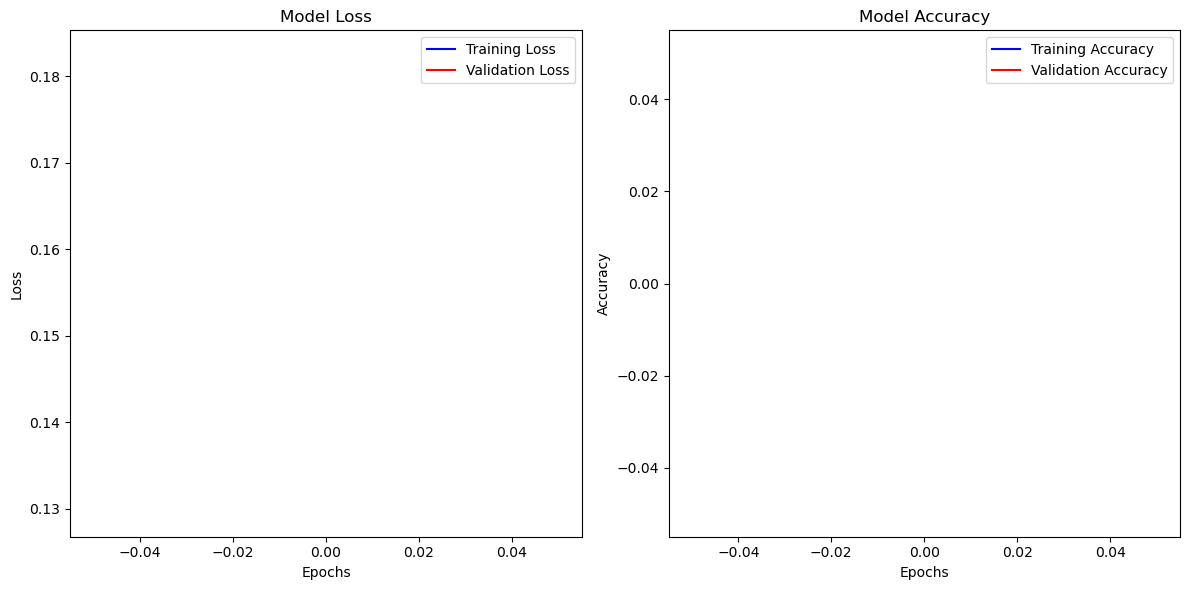

1601/1601 [==============================] - 969s 606ms/step - loss: 0.1827 - acc: 0.9389 - val_loss: 0.1294 - val_acc: 0.9590


In [157]:
import matplotlib.pyplot as plt
from keras.callbacks import Callback

class LossAccHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))
        
        # Plotting the loss and accuracy after each epoch
        plt.figure(figsize=(12, 6))
        
        # Plot training & validation loss values
        plt.subplot(1, 2, 1)
        plt.plot(self.losses, color='b', label='Training Loss')
        plt.plot(self.val_losses, color='r', label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Plot training & validation accuracy values
        plt.subplot(1, 2, 2)
        plt.plot(self.acc, color='b', label='Training Accuracy')
        plt.plot(self.val_acc, color='r', label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Create an instance of the LossAccHistory callback
history_callback = LossAccHistory()

# Train your model with the custom callback
model.fit(train_dataset, validation_data=validation_dataset, epochs=1, batch_size=5, shuffle=False, callbacks=[history_callback])
